In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Exploration

In [223]:
data = pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [262]:
data.shape

(569, 33)

In [224]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [226]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Missing values

In [227]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [228]:
data_fe = data.drop(['Unnamed: 32','id'], axis=1)
data_fe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [229]:
#changing the diagnosis labels to 0 and 1---B=0, M=1
data_fe['diagnosis'] = data_fe['diagnosis'].replace(['B','M'],[0,1])

data_fe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [230]:
#number of samples(rows) and features(columns)
data_fe.shape

(569, 31)

In [231]:
data_fe.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [232]:
#count of number of Benign(0) and Malignant(1) samples
data_fe['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Plot of number of Benign(B) and Malignant(M) samples 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


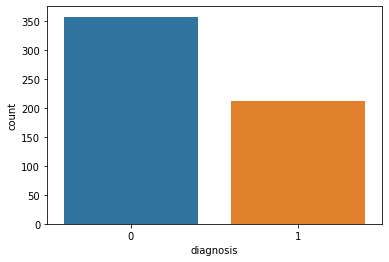

In [233]:
sns.countplot(data_fe['diagnosis'])

In [234]:
data_fe.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [235]:
#convert 'diagnosis' object type to int type
data_fe['diagnosis']=data_fe['diagnosis'].astype(str).astype(int)
data_fe.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

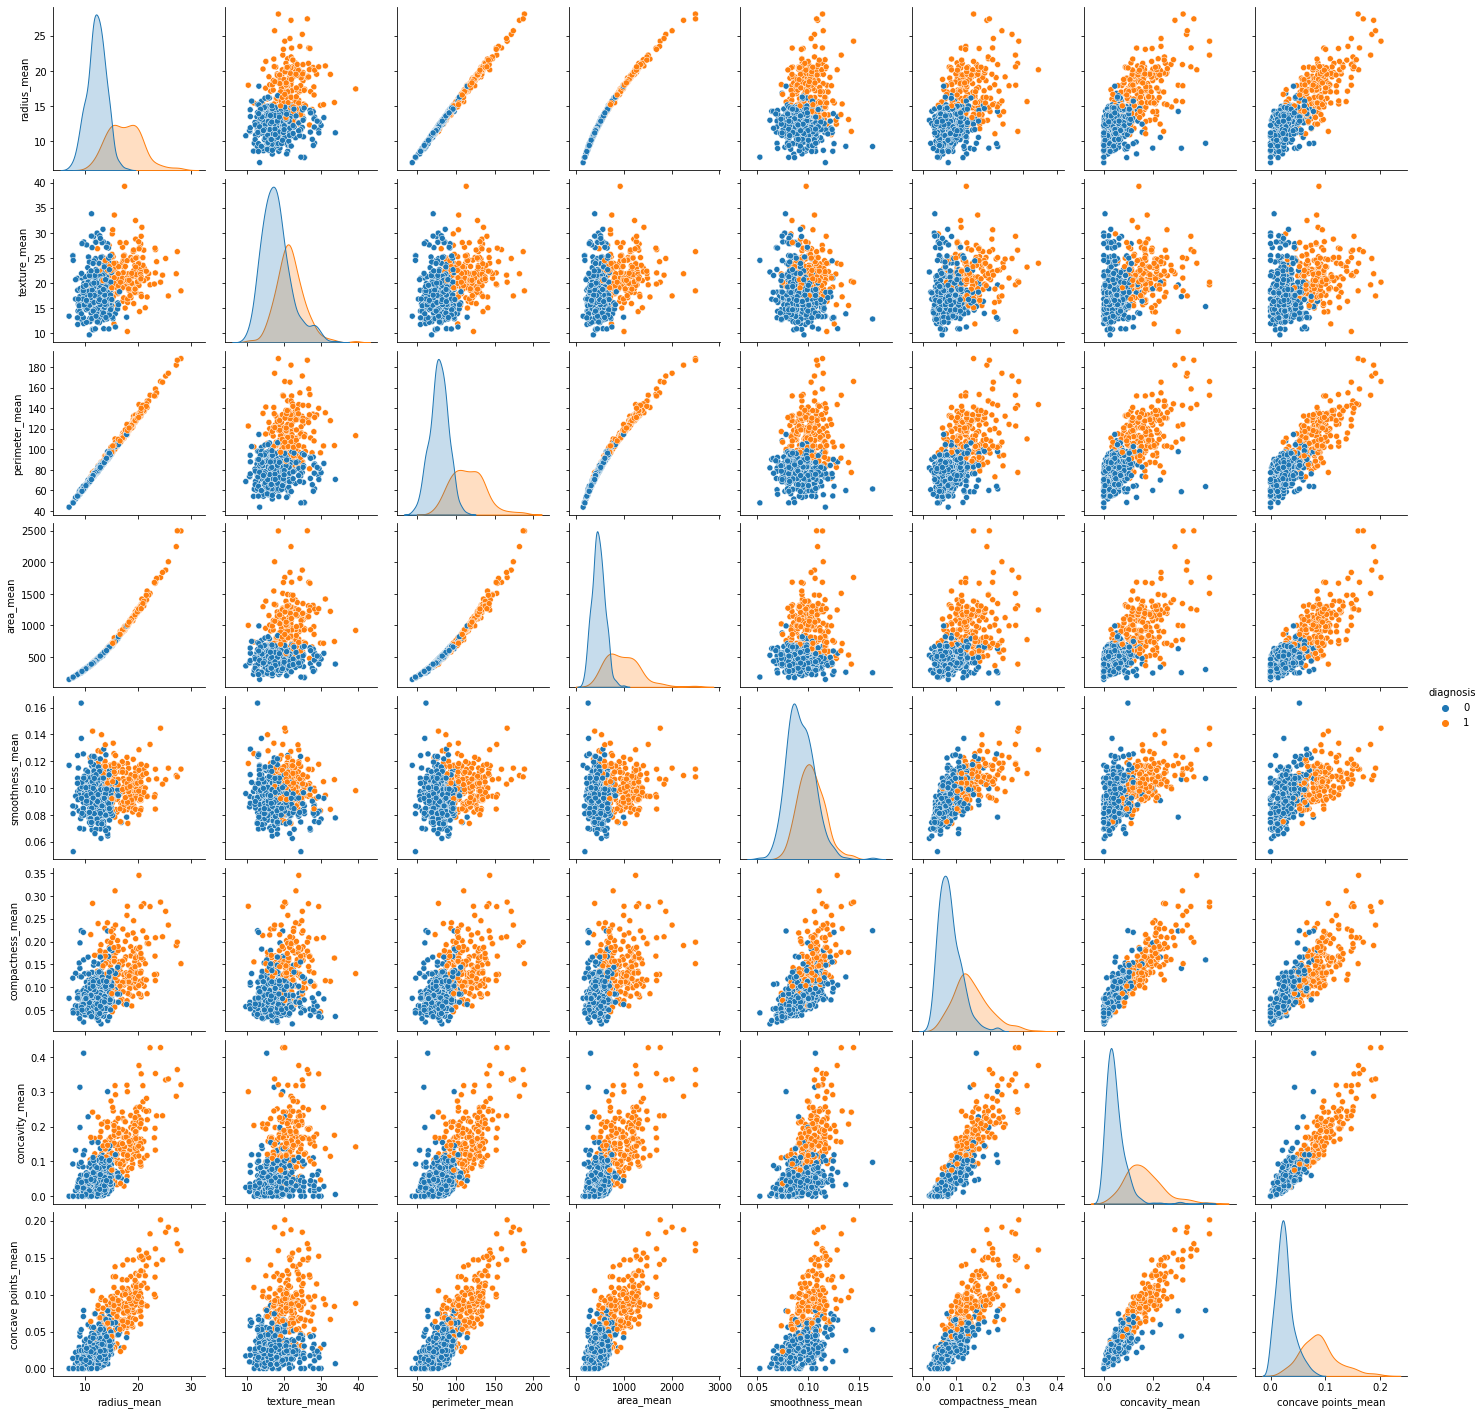

In [236]:
#pair-plots of various features
sns.pairplot(data_fe.iloc[:,0:9], hue='diagnosis')

In [237]:
data_corr = data_fe.corr()
data_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


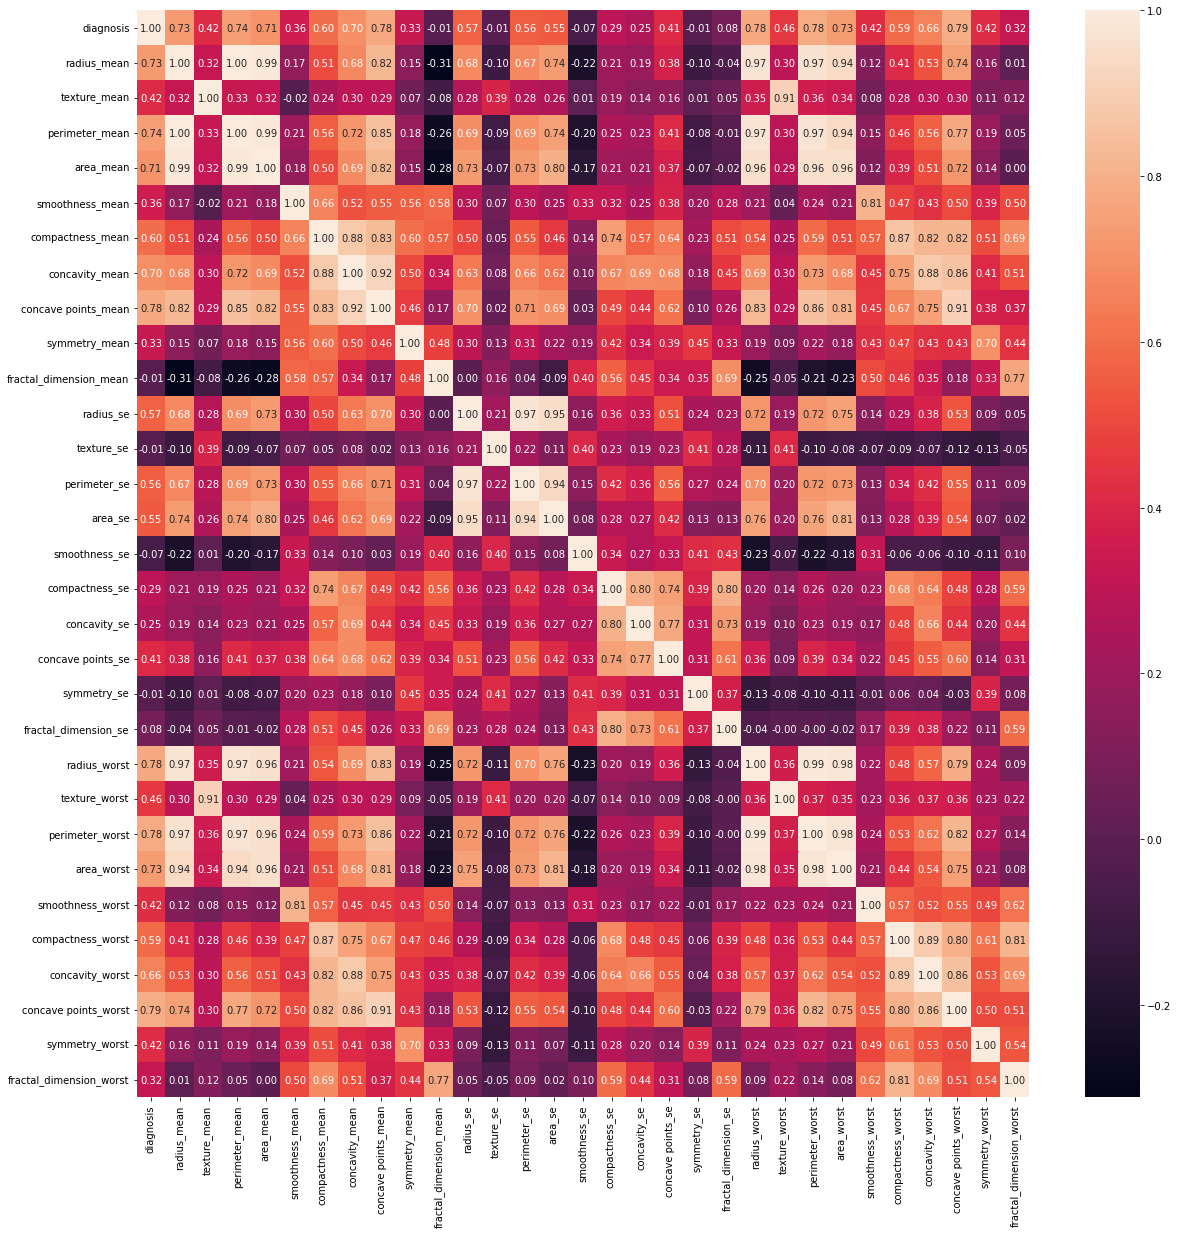

In [238]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_corr, annot=True, fmt='0.2f')

In [239]:
data_fe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [240]:
X_data = data_fe.drop(['diagnosis'], axis=1)
Y_data = data_fe['diagnosis']

In [241]:
#split the dataset into training set(70%) and test set(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state = 0)

In [242]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
s_scaling = StandardScaler()
X_train = s_scaling.fit_transform(X_train)
X_test = s_scaling.fit_transform(X_test)

Various Machine Learning Classification Algorithms

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score

In [244]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [245]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

Logistic Regression

In [246]:
def log_reg(X_train, Y_train):
  lg_reg = LogisticRegression()
  lg_reg.fit(X_train, Y_train)

  score = lg_reg.score(X_train, Y_train)
  Y_pred = lg_reg.predict(X_test)

  return score, Y_pred


Logistic Regression Training Accuracy: 0.9899497487437185


Logistic Regression Test Accuracy: 1.0


Confusion Matrix for Logistic Regression:

 [[108   0]
 [  0  63]]


Classification report for Logistic Regression:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



Accuracy: 1.0


F1 score of Logistic Regression Model: 1.0


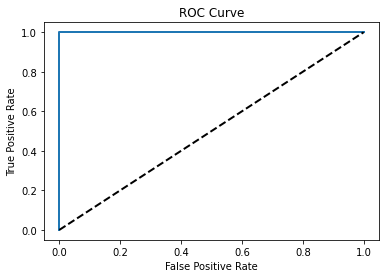

AUC: 1.0


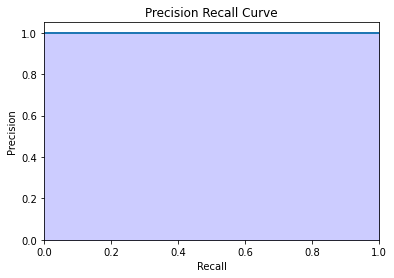

Average Precision score: 1.0


In [247]:
train_acc, Y_pred = log_reg(X_train, Y_train)
print('Logistic Regression Training Accuracy:', train_acc)
test_acc, Y_pred = log_reg(X_test, Y_test)
print('\n\nLogistic Regression Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for Logistic Regression:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for Logistic Regression:\n\n', class_rep)

accuracy_log = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_log)

f1_log = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_log)
accuracy = []
f1 = []
accuracy.append(accuracy_log)
f1.append(f1_log)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

Classifiers efficiency given area under the curve⁉

0.90-1 = excellent (A)
0.80-0.90 = good (B)
0.70-0.80 = fair (C)
0.60-0.70 = poor (D)
0.50-0.60 = fail (F)

Decision Tree Classifier

In [248]:
def dec_tree(X_train, Y_train):
  d_tree = DecisionTreeClassifier(max_depth=3)
  d_tree.fit(X_train, Y_train)

  score = d_tree.score(X_train, Y_train)
  Y_pred = d_tree.predict(X_test)

  return score, Y_pred

Decision Tree Training Accuracy: 0.9673366834170855


Decision Tree Test Accuracy: 0.9883040935672515


Confusion Matrix for Decision Tree:

 [[108   0]
 [  2  61]]


Classification report for Decision Tree:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



Accuracy: 0.9883040935672515


F1 score of Logistic Regression Model: 0.9838709677419354


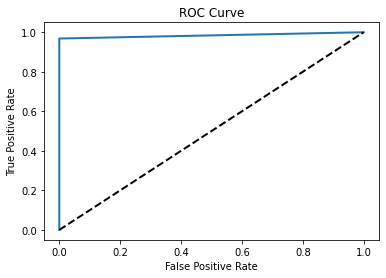

AUC: 0.9841269841269842


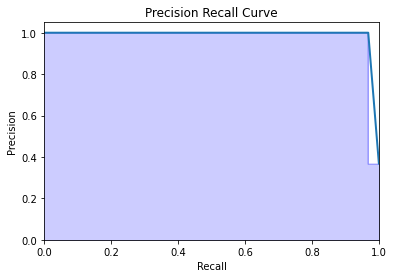

Average Precision score: 0.9799498746867168


In [249]:
train_acc, Y_pred = dec_tree(X_train, Y_train)
print('Decision Tree Training Accuracy:', train_acc)
test_acc, Y_pred = dec_tree(X_test, Y_test)
print('\n\nDecision Tree Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for Decision Tree:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for Decision Tree:\n\n', class_rep)

accuracy_tree = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_tree)

f1_tree = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_tree)

accuracy.append(accuracy_tree)
f1.append(f1_tree)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

Random Forest Classifier

In [250]:
def ran_forest(X_train, Y_train):
  r_for = RandomForestClassifier()
  r_for.fit(X_train, Y_train)

  score = r_for.score(X_train, Y_train)
  Y_pred = r_for.predict(X_test)

  return score, Y_pred

Random Forest Training Accuracy: 1.0


Random Forest Test Accuracy: 1.0


Confusion Matrix for Random Forest:

 [[108   0]
 [  0  63]]


Classification report for Random Forest:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



Accuracy: 1.0


F1 score of Logistic Regression Model: 1.0


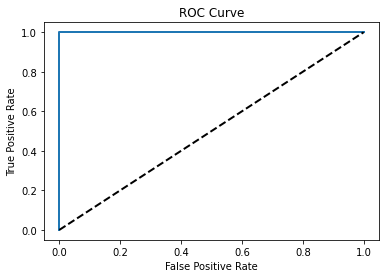

AUC: 1.0


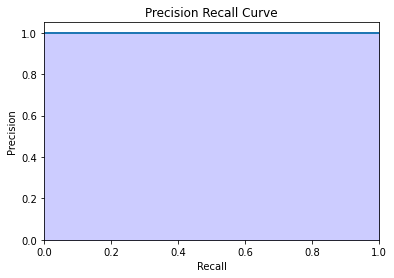

Average Precision score: 1.0


In [251]:
train_acc, Y_pred = ran_forest(X_train, Y_train)
print('Random Forest Training Accuracy:', train_acc)
test_acc, Y_pred = ran_forest(X_test, Y_test)
print('\n\nRandom Forest Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for Random Forest:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for Random Forest:\n\n', class_rep)

accuracy_forest = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_forest)

f1_forest = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_forest)

accuracy.append(accuracy_forest)
f1.append(f1_forest)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

K Nearest Neighbors Classifier(KNN)

In [252]:
def k_neighbors(X_train, Y_train):
  k_nn = KNeighborsClassifier(n_neighbors=10)
  k_nn.fit(X_train, Y_train)

  score = k_nn.score(X_train, Y_train)
  Y_pred = k_nn.predict(X_test)

  return score, Y_pred

KNN Training Accuracy: 0.9673366834170855


KNN Test Accuracy: 0.9473684210526315


Confusion Matrix for KNN classifier:

 [[108   0]
 [  9  54]]


Classification report for KNN classifier:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       1.00      0.86      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



Accuracy: 0.9473684210526315


F1 score of Logistic Regression Model: 0.923076923076923


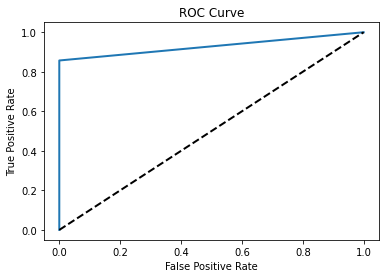

AUC: 0.9285714285714286


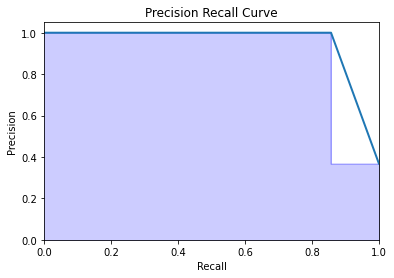

Average Precision score: 0.9097744360902256


In [253]:
train_acc, Y_pred = k_neighbors(X_train, Y_train)
print('KNN Training Accuracy:', train_acc)
test_acc, Y_pred = k_neighbors(X_test, Y_test)
print('\n\nKNN Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for KNN classifier:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for KNN classifier:\n\n', class_rep)

accuracy_KNN = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_KNN)

f1_KNN = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_KNN)

accuracy.append(accuracy_KNN)
f1.append(f1_KNN)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

Support Vector Machine Classification

In [254]:
def sup_vector(X_train, Y_train):
  svv_class = SVC()
  svv_class.fit(X_train, Y_train)

  score = svv_class.score(X_train, Y_train)
  Y_pred = svv_class.predict(X_test)

  return score, Y_pred

SVM classifier Training Accuracy: 0.9824120603015075


SVM classifier Test Accuracy: 0.9766081871345029


Confusion Matrix for SVM classifier:

 [[108   0]
 [  4  59]]


Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Accuracy: 0.9766081871345029


F1 score of Logistic Regression Model: 0.9672131147540983


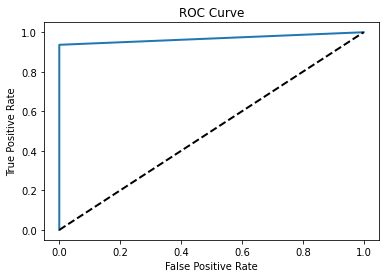

AUC: 0.9682539682539683


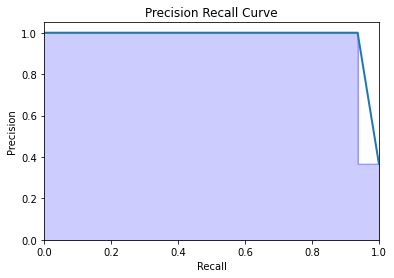

Average Precision score: 0.9598997493734336


In [255]:
train_acc, Y_pred = sup_vector(X_train, Y_train)
print('SVM classifier Training Accuracy:', train_acc)
test_acc, Y_pred = sup_vector(X_test, Y_test)
print('\n\nSVM classifier Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for SVM classifier:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for SVM classifier:\n\n', class_rep)

accuracy_SVM = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_SVM)

f1_SVM = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_SVM)

accuracy.append(accuracy_SVM)
f1.append(f1_SVM)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

Naive Bayes

In [256]:
def nav_bayes(X_train, Y_train):
  n_bayes = GaussianNB()
  n_bayes.fit(X_train, Y_train)

  score = n_bayes.score(X_train, Y_train)
  Y_pred = n_bayes.predict(X_test)

  return score, Y_pred

Naive Bayes classifier Training Accuracy: 0.9422110552763819


Naive Bayes classifier Test Accuracy: 0.935672514619883


Confusion Matrix for Naive Bayes classifier:

 [[103   5]
 [  6  57]]


Classification report for Naive Bayes classifier:

               precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Accuracy: 0.935672514619883


F1 score of Logistic Regression Model: 0.912


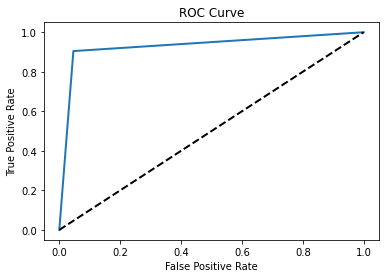

AUC: 0.9292328042328042


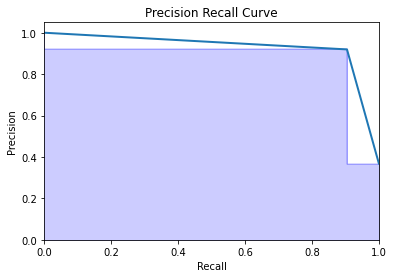

Average Precision score: 0.8668849543212871


In [257]:
train_acc, Y_pred = nav_bayes(X_train, Y_train)
print('Naive Bayes classifier Training Accuracy:', train_acc)
test_acc, Y_pred = nav_bayes(X_test, Y_test)
print('\n\nNaive Bayes classifier Test Accuracy:', test_acc)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\n\nConfusion Matrix for Naive Bayes classifier:\n\n', conf_matrix)

#Classification Report
class_rep = classification_report(Y_test, Y_pred)
print('\n\nClassification report for Naive Bayes classifier:\n\n', class_rep)

accuracy_Bayes = metrics.accuracy_score(Y_test, Y_pred)
print('\n\nAccuracy:', accuracy_Bayes)

f1_bayes = f1_score(Y_test, Y_pred)
print('\n\nF1 score of Logistic Regression Model:', f1_bayes)

accuracy.append(accuracy_Bayes)
f1.append(f1_bayes)

fpr,tpr, label = roc_curve(Y_test, Y_pred)
plot_roc()
print('AUC:', auc(fpr,tpr))

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plot_precision_recall()
print('Average Precision score:', average_precision_score(Y_test, Y_pred))

RESULTS

In [258]:
print('Accuracy of Logistic Regression Model:',accuracy_log)
print('F1-score of Logistic Regression Model:',f1_log)
print('\nAccuracy of Decision Tree Classifier Model:',accuracy_tree)
print('F1-score of Decision Tree Classifier Model:',f1_tree)
print('\nAccuracy of Random Forest Classifier Model:',accuracy_forest)
print('F1-score of Random Forest Classifier Model:',f1_forest)
print('\nAccuracy of KNN Model:',accuracy_KNN)
print('F1-score of KNN Model:',f1_KNN)
print('\nAccuracy of SVM Model:',accuracy_SVM)
print('F1-score of SVM Model:',f1_SVM)
print('\nAccuracy of Naive Bayes Classifier Model:',accuracy_Bayes)
print('F1-score of Naive Bayes Classifier Model:',f1_bayes)

Accuracy of Logistic Regression Model: 1.0
F1-score of Logistic Regression Model: 1.0

Accuracy of Decision Tree Classifier Model: 0.9883040935672515
F1-score of Decision Tree Classifier Model: 0.9838709677419354

Accuracy of Random Forest Classifier Model: 1.0
F1-score of Random Forest Classifier Model: 1.0

Accuracy of KNN Model: 0.9473684210526315
F1-score of KNN Model: 0.923076923076923

Accuracy of SVM Model: 0.9766081871345029
F1-score of SVM Model: 0.9672131147540983

Accuracy of Naive Bayes Classifier Model: 0.935672514619883
F1-score of Naive Bayes Classifier Model: 0.912


Visualizations

In [259]:
models = ['Logistic_Regression','Decision_Tree','Random_Forest','KNN','SVM','Naive_Bayes']
d = {'models': models,'accuracy': accuracy, 'f1': f1}
dplot = pd.DataFrame(data=d)
dplot

,models,accuracy,f1
0,Logistic_Regression,1.000000,1.000000
1,Decision_Tree,0.988304,0.983871
2,Random_Forest,1.000000,1.000000
3,KNN,0.947368,0.923077
4,SVM,0.976608,0.967213
5,Naive_Bayes,0.935673,0.912000


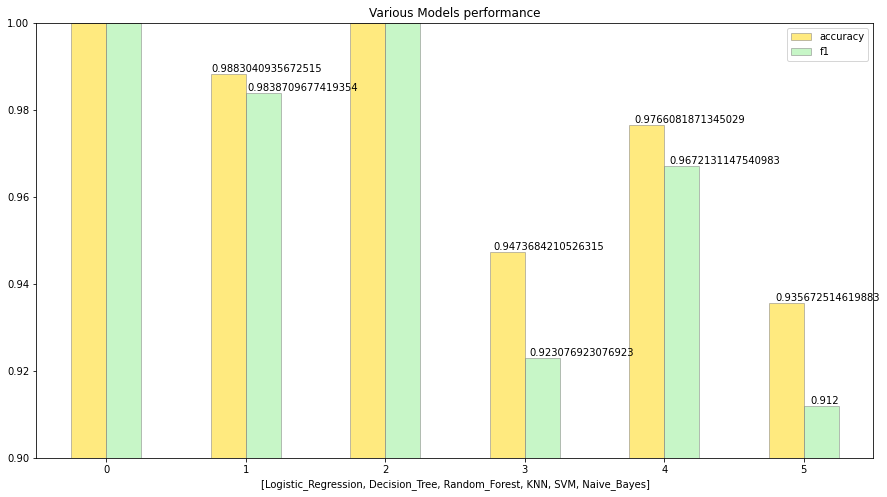

In [260]:
#sns.barplot(x='models', y='scores',hue='models', data=dplot)
dp = dplot.plot(kind='bar', figsize = (15,8), ylim = (0.9, 1), xlabel= ['Logistic_Regression','Decision_Tree','Random_Forest','KNN','SVM','Naive_Bayes'],
        color = ['gold', 'lightgreen'],
        rot = 0, title ='Various Models performance',
        edgecolor = 'grey', alpha = 0.5)


for p in dp.patches:
    dp.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()